In [11]:
# load Packages & Settings
import os
import numpy as np

def get_files(rootdir, suffix):
    file_list = []
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            if file.endswith(suffix):
                file_list.append(os.path.join(subdir, file))
    file_list.sort(key=lambda x: x)
    return file_list

# load data from file and return it as numpy-array
def load_data(filename):
    arr = []
    temp = []
    for line in [line for line in open(filename, 'r')]:
            # parse each line and convert to floating
        while(line != ''):
            temp = [float(element) for element in line.split(',') if (element != '')] 
            temp =  np.array(temp[:]) 
            # shape into columns
            temp.reshape(-1,1)
            arr.append(temp)
    # release the temp variable
    del temp
    return np.array(arr)

In [30]:
filename = '/Users/yiyi/Desktop/PPMS_FMR/2.3nmCoFeB2018-0013-280To20K-v3/280K.txt'
arr = []
temp = []
for line in [line for line in open(filename, 'r')]:
    # parse each line and convert to floating
    for element in line.split(','):
        if (element != '' and type(eval(element)) == float):
            print(element)
#     temp = [float(element) for element in line.split(',') if (element != '' and type(eval(element)) == float)]
#     print(temp)
#         temp =  np.array(temp[:]) 
#     # shape into columns
#         temp.reshape(-1,1)
#         arr.append(temp)

    9123.27
     57.180
     56.498
     57.861

    9814.23
     62.756
     62.036
     63.476

   10503.53
     69.714
     68.889
     70.540

   11190.54
     74.713
     73.847
     75.579

   11876.29
     81.999
     81.317
     82.682

   12561.14
     85.504
     83.764
     87.244

   13243.61
     90.700
     88.932
     92.468


/Users/yiyi/Desktop/PPMS_FMR/2.3nmCoFeB2018-0013-280To20K-v3/240K.txt
240 K:  [0.03453125 0.62991283]
/Users/yiyi/Desktop/PPMS_FMR/2.3nmCoFeB2018-0013-280To20K-v3/280K.txt
280 K:  [0.034335   0.63806157]


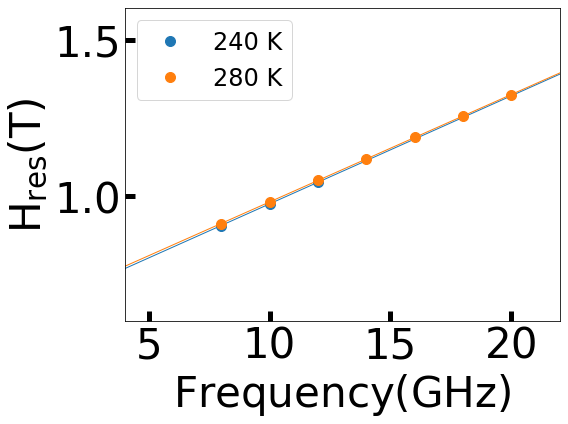

In [33]:
#############################
#############################
# Name: load_data.py
# Author: YCHEN-NYU, last modified: 2018-02-05
# Institution: NYU, Email: yc1224@nyu.edu
# Structure of Data Sets:
# row:  1, 2, 3, 4, 5
# data: angle(degree), Hall-omega-X1, Hall-omega-Y1, RL-2omega-X2, RL-2omega-Y2
# Summary: 
# Load rawdata from Lockin Measurements of YIG/Pt sample
# Average out X-1, Y-1, X-2, Y-2 for the sample angle, export the data into .csv file
#############################
#############################

from load_data import *
from functions import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import cm
from sklearn import linear_model
from scipy.optimize import curve_fit


# define the root-directory and the sub-directory
rootDir = "/Users/yiyi/Desktop/PPMS_FMR/"
subDir = "2.3nmCoFeB2018-0013-280To20K-v3"
os.chdir(rootDir + subDir)

file_list = get_files(rootDir + subDir, 'K.txt')
column_names = ['freq_GHz', 'Hres_Oe', 'FWHM_Oe', 'FWHM_Upper_Oe', 'FWHM_Lower_Oe']
params  = []
iColor = 0

fig, ax = plt.subplots(figsize=(8, 6))
for file in file_list:
    print(file)
    data = load_data(file)
    data = pd.DataFrame(data)
    data.columns = column_names
    temperature = file.split(subDir + "/")[1].split('K.txt')[0]
    popt, pcov = curve_fit(linear, data['freq_GHz'], data['Hres_Oe']/1e4, p0 = None, maxfev=10000) 
    xmesh = np.linspace(0, 25, 100)
    ymesh = linear(xmesh, *popt)
    print(temperature, 'K: ', popt)
    plt.plot(data['freq_GHz'], data['Hres_Oe']/1e4, color = 'C' + str(iColor%9),
             marker = 'o', markersize = 10, linestyle = 'none', label = temperature + ' K')
    plt.plot(xmesh, ymesh, linestyle = '-', linewidth = 1, color = 'C' + str(iColor%9))
    params.append([float(temperature), popt[1], popt[0]])
    iColor = iColor + 1

fontSize = 42
ax.tick_params(axis='both', direction="in", length=10, width=5)
plt.ylabel(r'$\mathrm {H_{res}(T)}$', fontsize=fontSize)
plt.xlabel(r'$\mathrm {Frequency(GHz)}$', fontsize=fontSize)
YTicks = np.linspace(.5, 1.5, 3)
XTicks = np.linspace(0, 25, 6)
XLIM = [4, 22]
YLIM = [0.6, 1.6]
plt.xticks(XTicks, fontsize=fontSize)
plt.yticks(YTicks, fontsize=fontSize)
plt.xlim(XLIM)
plt.ylim(YLIM)
plt.legend(fontsize = 24)
plt.tight_layout()
# plt.savefig('./Hres-freq.png', dpi=300, bbox_inches='tight')
plt.show()